Data analysis process is running!
Connecting local mysql database.
1000
1000
                pid pcount    ptime  cluster
1  RSH0000005004230      6  42.0867        0
2  RSH0000005004245     11  56.2489        0
3  RSH0000005004274     10  80.8814        0
4  RSH0000005004276     27  111.008        0
5  RSH0000005004282     27  140.479        0


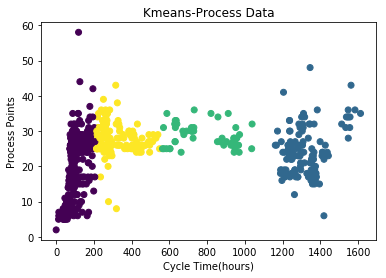

        pid
pcount     
26      196
25      151
27      104
28       65
24       60
[26]
         pid
cluster     
0        655
3        148
1        142
2         55
[0]
Process parse: 1
2d-bc-le    145
s-extr        7
Name: 0, dtype: int64
Process parse: 2
s-extr      145
2d-bc-le      7
Name: 1, dtype: int64
Process parse: 3
2d-bc-qc    152
Name: 2, dtype: int64
Process parse: 4
d-cnc2       137
polish-qc     13
2d-bc-qc       2
Name: 3, dtype: int64
Process parse: 5
polish-qc    139
d-cnc7        10
2d-bc-qc       1
d-cnc2         1
cnc7-qc        1
Name: 4, dtype: int64
Process parse: 6
d-cnc7       134
cnc7-qc       14
polish-qc      2
cnc7-pkg       1
d-cnc2         1
Name: 5, dtype: int64
Process parse: 7
cnc7-qc      128
cnc7-pkg      14
d-cnc7         8
sb-qc          1
polish-qc      1
Name: 6, dtype: int64
Process parse: 8
cnc7-pkg    128
sb-qc        14
cnc7-qc       9
a-cbn         1
Name: 7, dtype: int64
Process parse: 9
sb-qc       128
a-cbn        14
cnc7-pkg      9
a-

/Users/Issac/workspace/AppleProject/DragonProject/code/process.py:101: FutureWarning: icol(i) is deprecated. Please use .iloc[:,i]
  parse_t = T.icol(i).value_counts()


In [2]:
# %load main.py
#Filename:    main.py
#Date:        2017/05/29
#Description: The program entrance

import os
import sys
import db_wrapper
import scan_rate
import process

global database_type
#Option：mysql pgsql remote
database_type = 'mysql'


def process_analysis():
  tableName = """process"""
  process.calcProcessStation(tableName)


def scan_rate_analysis():
  #tableName = """t_logs"""
  tableName = """process"""
  nextProcessName = """polish-qc"""
  curProcessName = """d-cnc2"""
  processFlow = ['2d-bc-le', 's-extr', '2d-bc-qc',
                'd-cnc2', 'polish-qc', 'd-cnc7', 'cnc7-qc', 'cnc7-pkg', 'sb-qc', 'a-cbn', 'a-glo', 'ano-qc', 'ano-pkg', 'd-cnc9', 'a-thk', 'cnc10-qc', 'cnc10-pkg', 'printing-qc', 'a-flt', 'a-xy', 'a-ldg', 'aim', 'fqc', 'fatp-lbl', 'si', 'fg-pkg']

  scan_rate.calcProcessScanRate(tableName, processFlow)


def main():
  print("Data analysis process is running!")

  global database_type
  db_wrapper.connectDB(database_type)

  #Data Analysis
 # scan_rate_analysis()
  process_flow = process_analysis()


  #Close database
  db_wrapper.closeDB(database_type)


if __name__=="__main__":
  main()